[*********************100%***********************]  1 of 1 completed


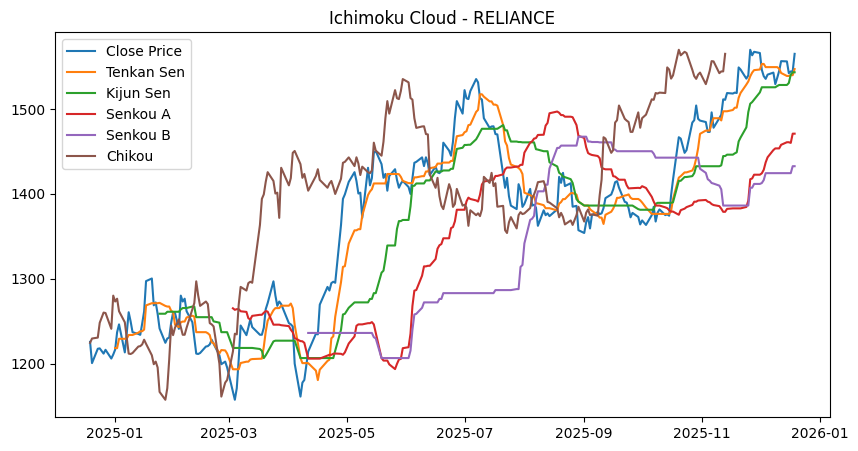

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
data = yf.download("RELIANCE.NS",period = "1y",auto_adjust = True)
#Momentum indicator(Ichimoku Cloud lines)
data['tenkan_sen'] = (data['High'].rolling(9).max() +data['Low'].rolling(9).min())/2
data['kijun_sen'] = (data['High'].rolling(26).max() +data['Low'].rolling(26).min())/2
data['senkou_a'] = ((data['tenkan_sen'] + data['kijun_sen'])/2).shift(26)
data['senkou_b'] = ((data['High'].rolling(52).max() +data['Low'].rolling(52).min())/2).shift(26)
data['chikou'] = data['Close'].shift(-26)

plt.figure(figsize=(10,5))
plt.plot(data['Close'],label = "Close Price")
plt.plot(data['tenkan_sen'],label = "Tenkan Sen")
plt.plot(data['kijun_sen'],label = "Kijun Sen")
plt.plot(data['senkou_a'],label = "Senkou A")
plt.plot(data['senkou_b'],label = "Senkou B")
plt.plot(data['chikou'],label = "Chikou")
plt.title("Ichimoku Cloud - RELIANCE")
plt.legend()
plt.show(block = True)

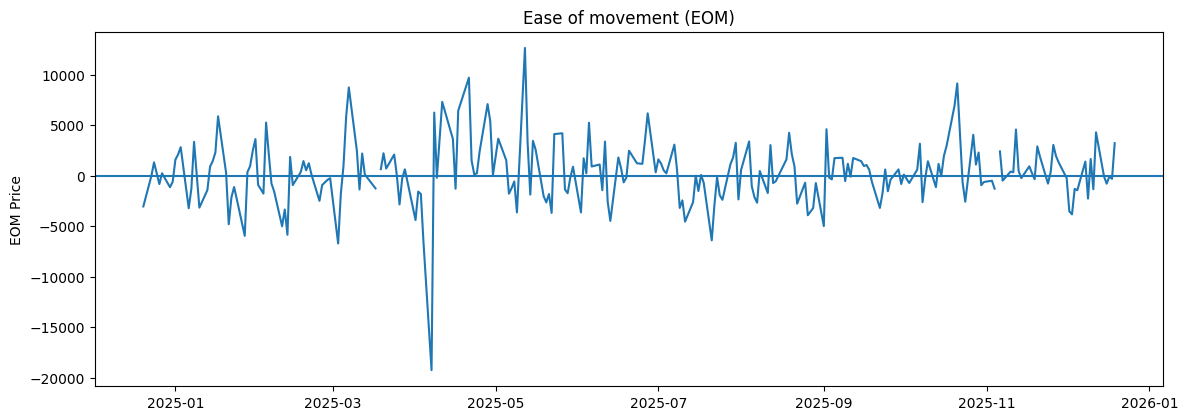

In [8]:
#Volume indicator(Ease of movement indicator)
data['midpoint_move'] = ((data['High'] + data['Low'])/2) - ((data['High'].shift(1) + data['Low'].shift(1))/2)
data['box_ratio'] = (data['Volume']/100000000)/(data['High']- data['Low'])
data['EOM'] = data['midpoint_move']/data['box_ratio']
data['EOM_14'] = data['EOM'].rolling(14).mean()

plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(data.index,data['EOM'])
plt.axhline(0)
plt.title("Ease of movement (EOM)")
plt.ylabel("EOM Price")
plt.tight_layout()
plt.show(block = True)

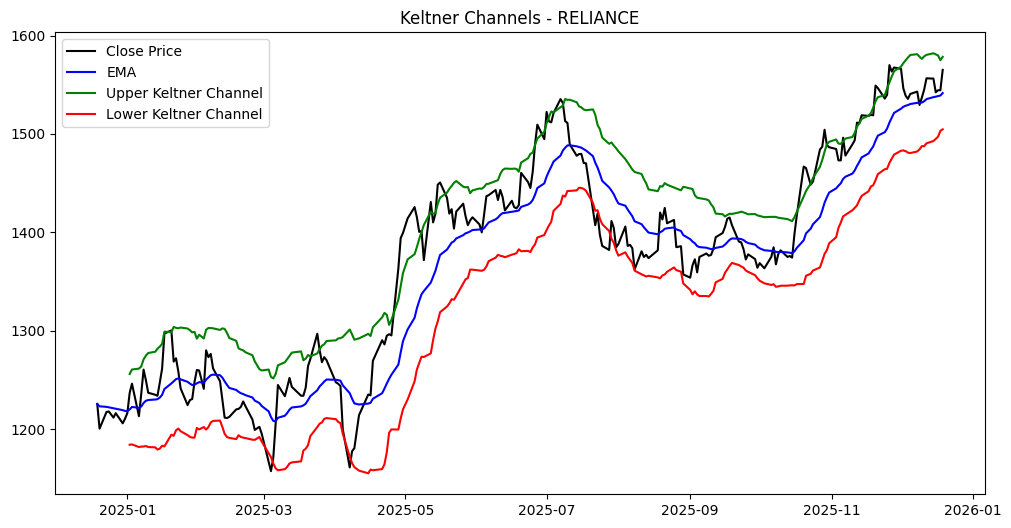

In [9]:
#Volatility indicator(Keltner Channels)
data['EMA'] = data['Close'].ewm(span = 20, adjust = False).mean()
data['High-Low'] = data['High'] - data['Low']
data['High-Close'] = abs(data['High'] - data['Close'].shift(1))
data['Low-Close'] = abs(data['Low'] - data['Close'].shift(1))
data['True Range'] = data[['High-Low','High-Close','Low-Close']].max(axis = 1)
data['ATR'] = data['True Range'].rolling(window = 10).mean()
data['Upper_KC'] = data['EMA'] + 2*data['ATR']
data['Lower_KC'] = data['EMA'] - 2*data['ATR']
plt.figure(figsize=(12,6))
plt.plot(data['Close'],label = "Close Price",color = "black")
plt.plot(data['EMA'],label = "EMA",color = "blue")
plt.plot(data['Upper_KC'],label = "Upper Keltner Channel",color = "green")
plt.plot(data['Lower_KC'],label = "Lower Keltner Channel",color = "red")
plt.title("Keltner Channels - RELIANCE")
plt.legend()
plt.show(block  = True)
